In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
ad = pd.read_csv(r"F:\DOWNLOADS\btcusd_1-min_data.csv")

In [3]:
ad

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
6725276,1.733616e+09,99943.00,99957.00,99938.00,99957.00,0.876736
6725277,1.733616e+09,99934.00,99934.00,99934.00,99934.00,0.000501
6725278,1.733616e+09,99931.00,99931.00,99929.00,99929.00,0.425126
6725279,1.733616e+09,99969.00,99969.00,99967.00,99967.00,0.158524


In [4]:
ad.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6725281 entries, 0 to 6725280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 307.9 MB


In [6]:
ad.corr()

,Timestamp,Open,High,Low,Close,Volume
Timestamp,1.000000,0.794316,0.794289,0.794345,0.794315,-0.078233
Open,0.794316,1.000000,1.000000,1.000000,0.999999,-0.084449
High,0.794289,1.000000,1.000000,0.999999,1.000000,-0.084363
Low,0.794345,1.000000,0.999999,1.000000,1.000000,-0.084552
Close,0.794315,0.999999,1.000000,1.000000,1.000000,-0.084457
Volume,-0.078233,-0.084449,-0.084363,-0.084552,-0.084457,1.000000


In [7]:
ad.describe()

,Timestamp,Open,High,Low,Close,Volume
count,6.725280e+06,6.725281e+06,6.725281e+06,6.725281e+06,6.725281e+06,6.725281e+06
mean,1.527207e+09,1.440962e+04,1.441586e+04,1.440320e+04,1.440965e+04,5.471727e+00
std,1.165248e+08,1.939493e+04,1.940246e+04,1.938728e+04,1.939503e+04,2.295975e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.426302e+09,4.122500e+02,4.124600e+02,4.120700e+02,4.122400e+02,1.827822e-02
50%,1.527192e+09,6.237120e+03,6.239980e+03,6.233660e+03,6.237130e+03,5.000000e-01
75%,1.628082e+09,2.303487e+04,2.304210e+04,2.302600e+04,2.303400e+04,3.187313e+00
max,1.733616e+09,1.036260e+05,1.036470e+05,1.036180e+05,1.036250e+05,5.853852e+03


In [8]:
ad.dropna(how='any',inplace=True)
ad.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [9]:
ad['Timestamp']=ad['Timestamp'].astype(int)
ad['Open']=ad['Open'].astype(int)
ad['High']=ad['High'].astype(int)
ad['Low']=ad['Low'].astype(int)
ad['Close']=ad['Close'].astype(int)
ad['Volume']=ad['Volume'].astype(int)

In [10]:
ad.head(1)

,Timestamp,Open,High,Low,Close,Volume
0,1325412060,4,4,4,4,0


In [11]:
ad.tail(5)

,Timestamp,Open,High,Low,Close,Volume
6725275,1733615760,99840,99840,99840,99840,0
6725276,1733615820,99943,99957,99938,99957,0
6725277,1733615880,99934,99934,99934,99934,0
6725278,1733615940,99931,99931,99929,99929,0
6725279,1733616000,99969,99969,99967,99967,0


In [12]:
ad.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6725275    False
6725276    False
6725277    False
6725278    False
6725279    False
Length: 6725280, dtype: bool

In [13]:
ad.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [14]:
ad.size

40351680

In [15]:
ad.shape

(6725280, 6)

In [16]:
print(ad.Volume.value_counts)

<bound method IndexOpsMixin.value_counts of 0          0
1          0
2          0
3          0
4          0
          ..
6725275    0
6725276    0
6725277    0
6725278    0
6725279    0
Name: Volume, Length: 6725280, dtype: int32>


In [17]:
ad.head(1)

,Timestamp,Open,High,Low,Close,Volume
0,1325412060,4,4,4,4,0


In [18]:
x = ad.drop(['Open'],axis=1)
y = ad['Open']

In [19]:
x

,Timestamp,High,Low,Close,Volume
0,1325412060,4,4,4,0
1,1325412120,4,4,4,0
2,1325412180,4,4,4,0
3,1325412240,4,4,4,0
4,1325412300,4,4,4,0
...,...,...,...,...,...
6725275,1733615760,99840,99840,99840,0
6725276,1733615820,99957,99938,99957,0
6725277,1733615880,99934,99934,99934,0
6725278,1733615940,99931,99929,99929,0


In [20]:
y

0              4
1              4
2              4
3              4
4              4
           ...  
6725275    99840
6725276    99943
6725277    99934
6725278    99931
6725279    99969
Name: Open, Length: 6725280, dtype: int32

In [21]:
# Splitting Trannig and Test Data 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 2)

In [22]:
# Linear Regression Model

lin_reg_model = LinearRegression()



In [23]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [24]:
# pradiction of trainning data

trainning_data_prediction = lin_reg_model.predict(x_train)

In [25]:
# R Square Errors

error_score = metrics.r2_score(y_train,trainning_data_prediction)
print('r Squred error :',error_score)

r Squred error : 0.9999997037122847


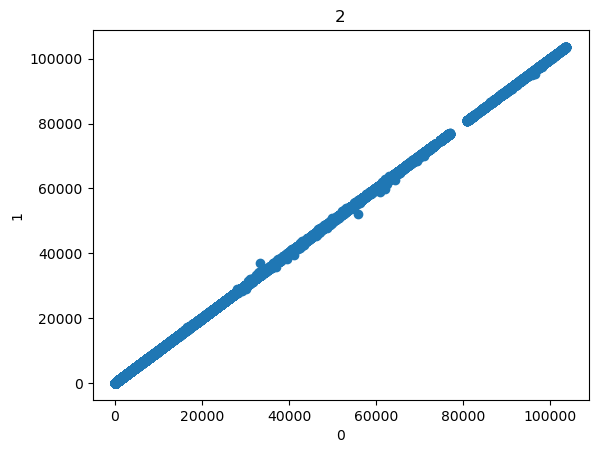

In [26]:
# Visulization the actual prices and prediction prices

plt.scatter(y_train,trainning_data_prediction)
plt.xlabel('0')
plt.ylabel('1')
plt.title('2')
plt.show()

In [27]:
# Test data set prediction
test_data_prediction = lin_reg_model.predict(x_test)

In [28]:
# Test data score

error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squred error:',error_score)

R squred error: 0.999999698095413


<function matplotlib.pyplot.show(close=None, block=None)>

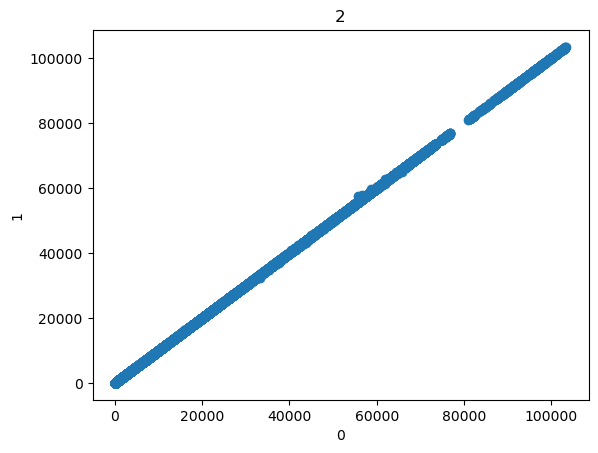

In [29]:
# Testing data prediction 
plt.scatter (y_test,test_data_prediction)
plt.xlabel('0')
plt.ylabel('1')
plt.title('2')
plt.show

In [30]:
print(lin_reg_model .predict([[1325412060,15,28,4,1]]))

[31.95409978]


C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
import pickle


In [35]:
with open('data.pkl','wb') as file:
    pickle.dump(lin_reg_model, file)

In [36]:
with open('data.pkl','rb') as file:
    loaded_data = pickle.load(file)
    print(loaded_data)

LinearRegression()
